170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 595s 9s/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 295s 9s/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - acc: 0.8944 - loss: 0.3353 - val_acc: 0.8970 - val_loss: 0.2900
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - acc: 0.9130 - loss: 0.2611 - val_acc: 0.9000 - val_loss: 0.2818
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - acc: 0.9022 - loss: 0.2596 - val_acc: 0.8970 - val_loss: 0.2839
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - acc: 0.9028 - loss: 0.2521 - val_acc: 0.9000 - val_loss: 0.2727
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - acc: 0.9109 - loss: 0.2177 - val_acc: 0.9030 - val_loss: 0.2750


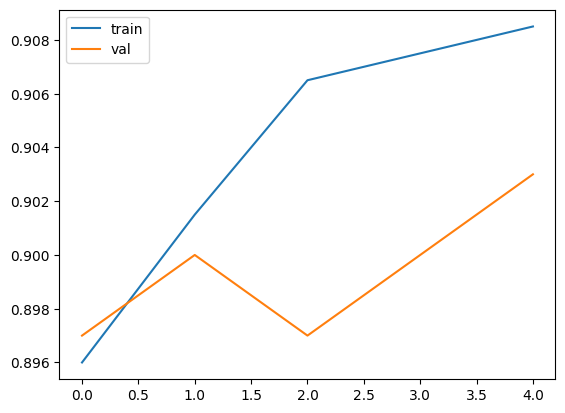

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers, optimizers
import matplotlib.pyplot as plt


(train_images, train_labels), (val_images, val_labels) = tf.keras.datasets.cifar10.load_data()
train_images, val_images = train_images[:2000], val_images[:1000]
train_labels, val_labels = (train_labels[:2000]==3).astype(int), (val_labels[:1000]==3).astype(int)  # class 'cat' vs others

train_images = tf.image.resize(train_images, (150,150))/255.0
val_images = tf.image.resize(val_images, (150,150))/255.0

# 2. Instantiate pretrained VGG16 base
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

train_features = conv_base.predict(train_images)
val_features = conv_base.predict(val_images)
train_features = train_features.reshape((2000, -1))
val_features = val_features.reshape((1000, -1))

model = models.Sequential([
    layers.Dense(256, activation='relu', input_dim=4*4*512),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=optimizers.RMSprop(1e-4), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_features, train_labels, epochs=5, batch_size=20, validation_data=(val_features, val_labels))

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.legend(); plt.show()
